In [3]:
# EDA
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import sweetviz as sv

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score

# Otimização de Hiperparâmetros
import optuna

In [2]:
df_obesidade = pd.read_csv('dataset\dataset.csv')

In [4]:
df_obesidade.head(5)

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,Nivel_Atividade_Fisica,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obeso
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [7]:
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Genero_Masculino                     2111 non-null   int64
 1   Idade                                2111 non-null   int32
 2   Historico_Familiar_Sobrepeso         2111 non-null   int64
 3   Consumo_Alta_Caloria_Com_Frequencia  2111 non-null   int64
 4   Consumo_Vegetais_Com_Frequencia      2111 non-null   int32
 5   Refeicoes_Dia                        2111 non-null   int32
 6   Consumo_Alimentos_entre_Refeicoes    2111 non-null   int64
 7   Fumante                              2111 non-null   int64
 8   Consumo_Agua                         2111 non-null   int32
 9   Monitora_Calorias_Ingeridas          2111 non-null   int64
 10  Nivel_Atividade_Fisica               2111 non-null   int32
 11  Nivel_Uso_Tela                       2111 non-null   int

In [6]:
# Convertendo colunas para tipo float
lista_colunas = ['Idade', 'Consumo_Vegetais_Com_Frequencia', 'Refeicoes_Dia', 
                 'Consumo_Agua', 'Nivel_Atividade_Fisica', 'Nivel_Uso_Tela']

df_obesidade[lista_colunas] = df_obesidade[lista_colunas].astype(int)

In [9]:
df_obesidade.isna().sum()

Genero_Masculino                       0
Idade                                  0
Historico_Familiar_Sobrepeso           0
Consumo_Alta_Caloria_Com_Frequencia    0
Consumo_Vegetais_Com_Frequencia        0
Refeicoes_Dia                          0
Consumo_Alimentos_entre_Refeicoes      0
Fumante                                0
Consumo_Agua                           0
Monitora_Calorias_Ingeridas            0
Nivel_Atividade_Fisica                 0
Nivel_Uso_Tela                         0
Consumo_Alcool                         0
Transporte_Automovel                   0
Transporte_Bicicleta                   0
Transporte_Motocicleta                 0
Transporte_Publico                     0
Transporte_Caminhada                   0
Obeso                                  0
dtype: int64

## EDA

In [11]:
# distribuição da variavel target - Obsidade
px.bar(df_obesidade.value_counts('Obeso'))

In [12]:
# distribuição da variavel target (percentual) - Obsidade 
px.bar(df_obesidade.value_counts('Obeso') / len(df_obesidade) * 100)

In [13]:
# Analise univariada
px.histogram(df_obesidade, x='Idade')

In [14]:
px.box(df_obesidade, y='Idade')

In [15]:
px.bar(df_obesidade.value_counts('Genero_Masculino') / len(df_obesidade) * 100)

In [16]:
# Analise Univariada 
px.bar(df_obesidade.value_counts('Historico_Familiar_Sobrepeso') / len(df_obesidade) * 100)

In [17]:
# Analise Univariada 
px.bar(df_obesidade.value_counts('Nivel_Atividade_Fisica') / len(df_obesidade) * 100)

In [18]:
# Analise Univariada 
px.bar(df_obesidade.value_counts('Nivel_Uso_Tela') / len(df_obesidade) * 100)

In [19]:
# Formulação de Hipótese
# Faixa etária influencia na obesidade?
df_obesidade['Idade'].describe()

count    2111.000000
mean       23.972525
std         6.308664
min        14.000000
25%        19.000000
50%        22.000000
75%        26.000000
max        61.000000
Name: Idade, dtype: float64

In [20]:
# Bucketização
bins = [10, 20, 30, 40, 50, 60, 70]
bins_ordinal = [0, 1, 2, 3, 4, 5]
labels_faixa_etaria = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
df_obesidade['Faixa_Etaria_String'] = pd.cut(x = df_obesidade['Idade'], bins = bins, labels = labels_faixa_etaria, include_lowest=True)
df_obesidade['Faixa_Etaria'] = pd.cut(x = df_obesidade['Idade'], bins = bins, labels = bins_ordinal, include_lowest=True)

In [21]:
df_obesidade

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,...,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obeso,Faixa_Etaria_String,Faixa_Etaria
0,0,21,1,0,2,3,1,0,2,0,...,1,0,0,0,0,1,0,0,20-30,1
1,0,21,1,0,3,3,1,1,3,1,...,0,1,0,0,0,1,0,0,20-30,1
2,1,23,1,0,2,3,1,0,2,0,...,1,2,0,0,0,1,0,0,20-30,1
3,1,27,0,0,3,3,1,0,2,0,...,0,2,0,0,0,0,1,0,20-30,1
4,1,22,0,0,2,1,1,0,2,0,...,0,1,0,0,0,1,0,0,20-30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1,1,3,3,1,0,1,0,...,0,1,0,0,0,1,0,1,10-20,0
2107,0,21,1,1,3,3,1,0,2,0,...,0,1,0,0,0,1,0,1,20-30,1
2108,0,22,1,1,3,3,1,0,2,0,...,0,1,0,0,0,1,0,1,20-30,1
2109,0,24,1,1,3,3,1,0,2,0,...,0,1,0,0,0,1,0,1,20-30,1


In [22]:
# Criar tabela de contingência - Faixa Etaria e Obsidade
tabela_contigencia_faixa_etaria = sm.stats.Table.from_data(df_obesidade[['Obeso', 'Faixa_Etaria_String']])

In [23]:
tabela_contigencia_faixa_etaria.table_orig

Faixa_Etaria_String,10-20,20-30,30-40,40-50,50-60,60-70
Obeso,,,,,,
0,498,489,131,13,7,1
1,176,649,127,19,1,0


In [24]:
# Teste Qui-Quadrado de Pearson 
print(tabela_contigencia_faixa_etaria.test_nominal_association())

df          5
pvalue      0.0
statistic   170.1116865347508


In [25]:
# p-value < 0.05 - Rejeitamos a hipótese nula - portanto as variaveis não são independentes

In [26]:
# Automatizando EDA
sv_obesidade_report = sv.analyze(df_obesidade, target_feat='Obeso')

                                             |          | [  0%]   00:00 -> (? left)


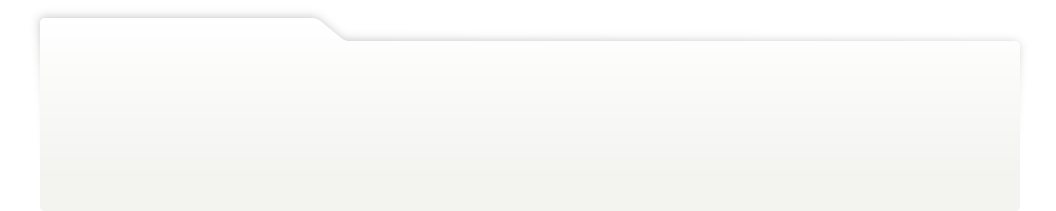
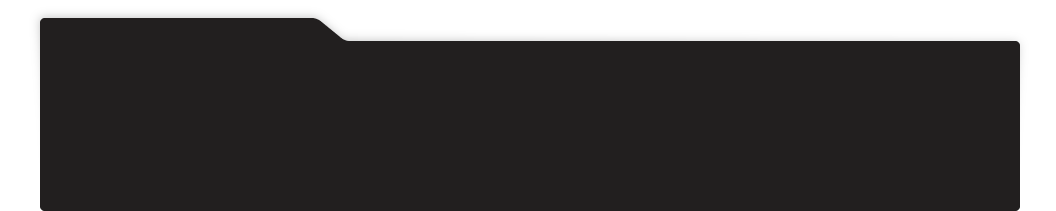
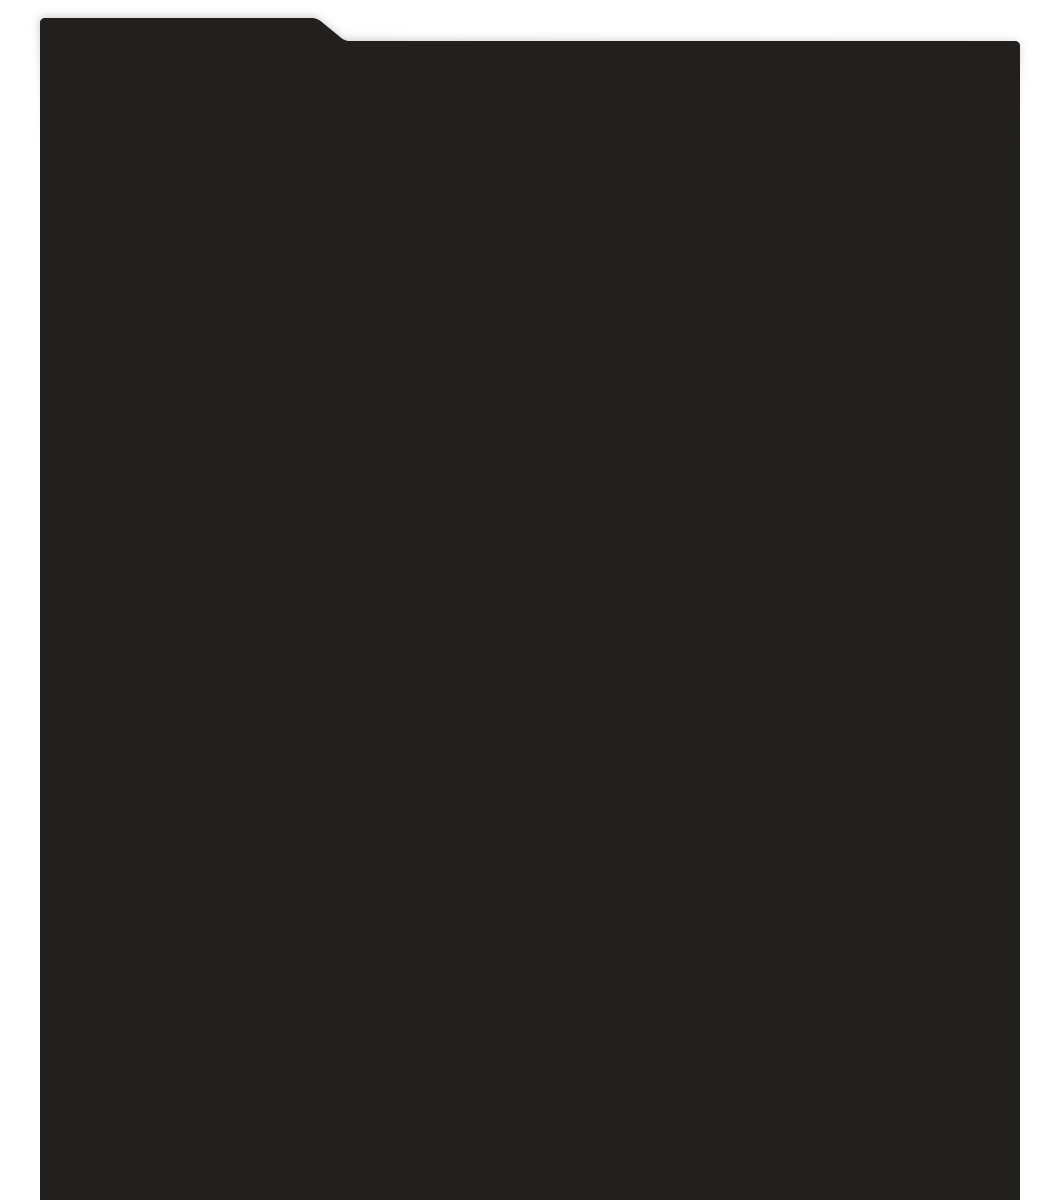
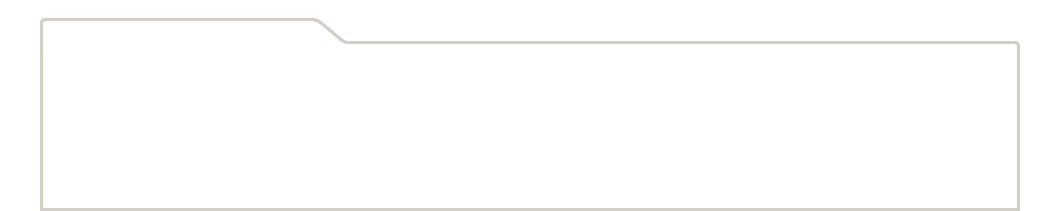
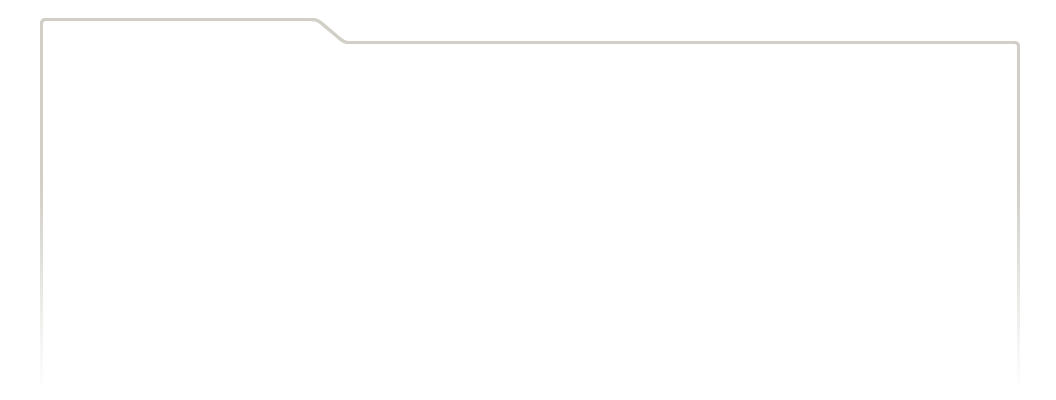
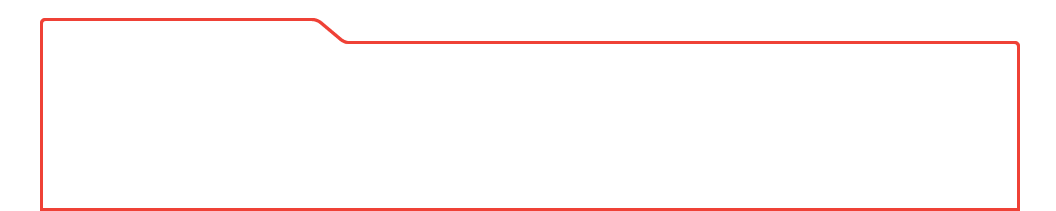
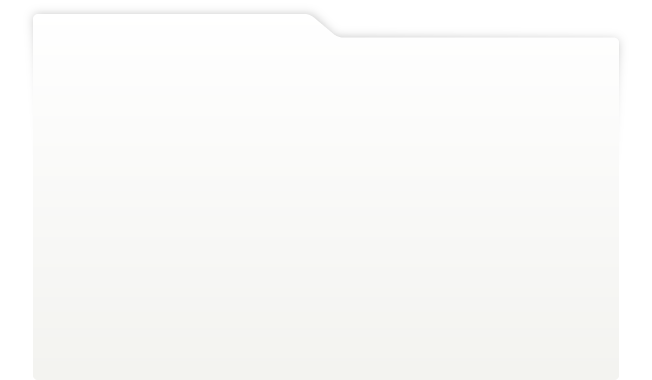
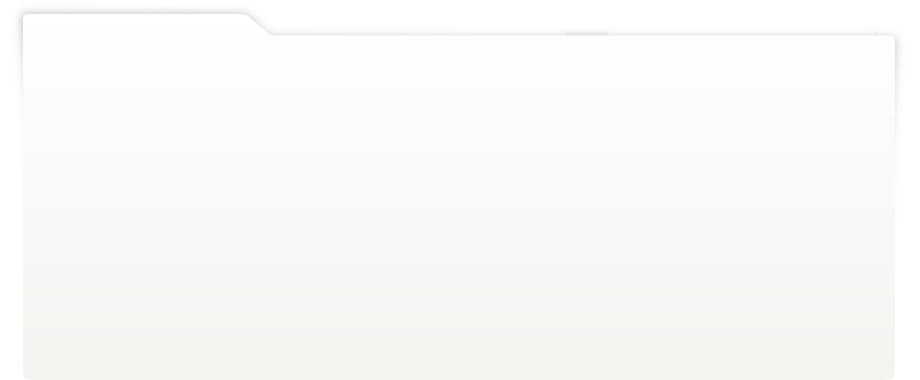
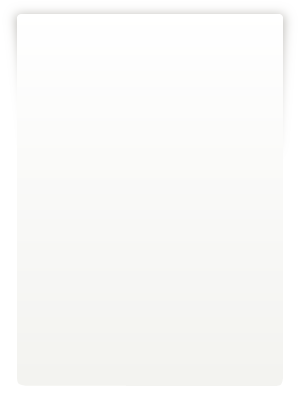
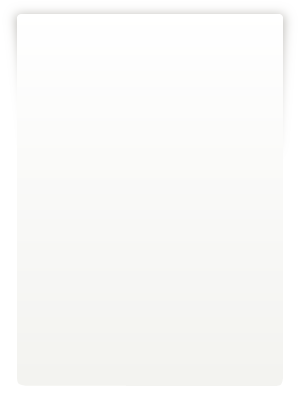
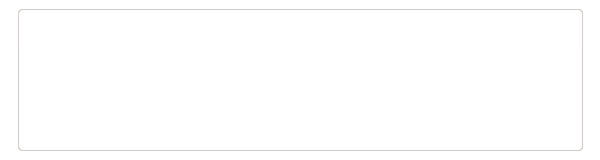
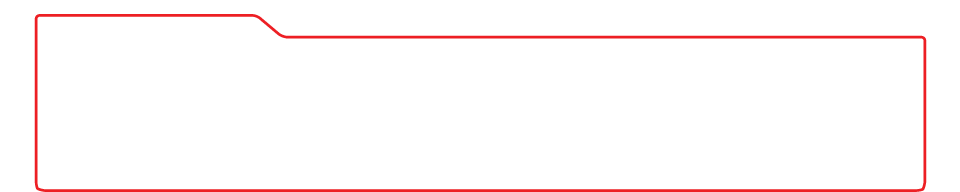
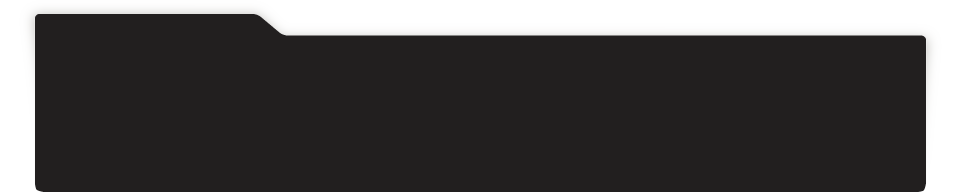
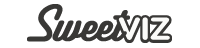
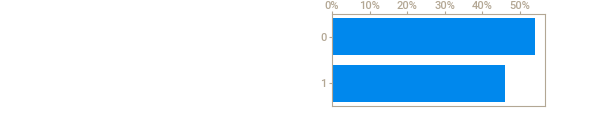
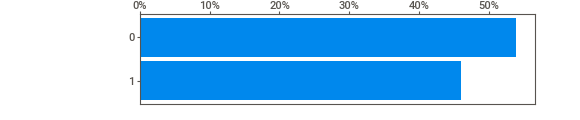
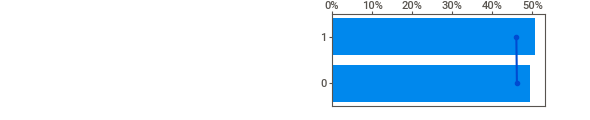
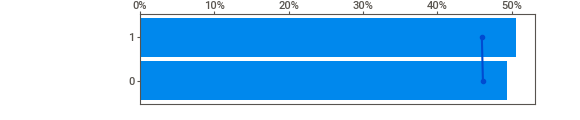
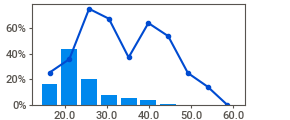
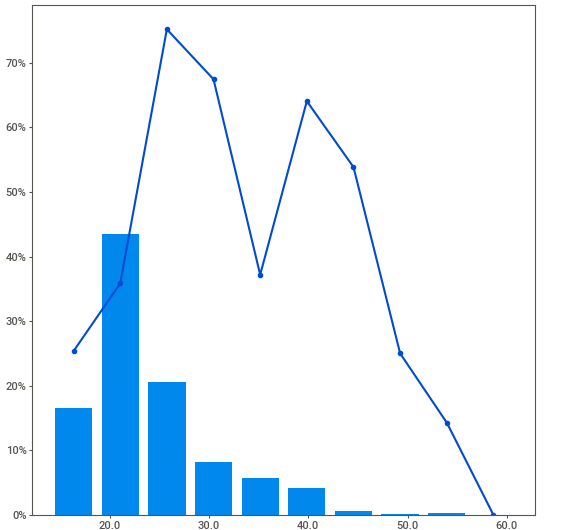
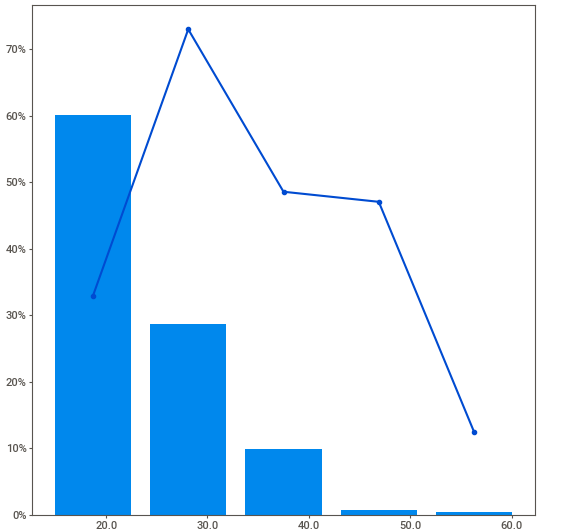
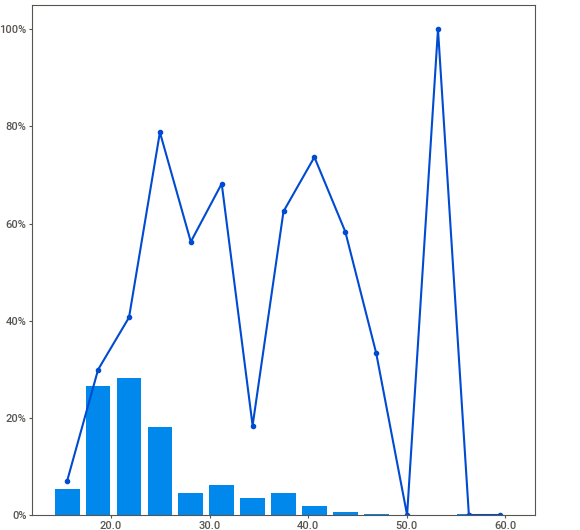
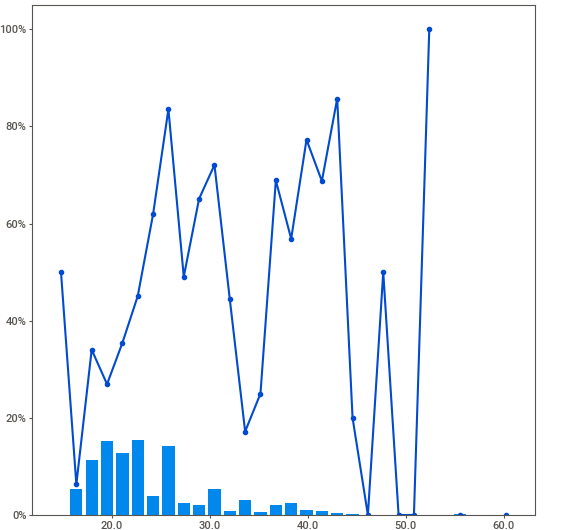
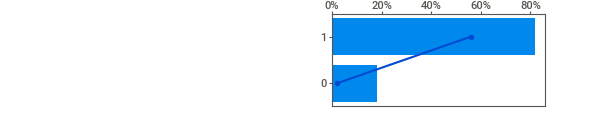
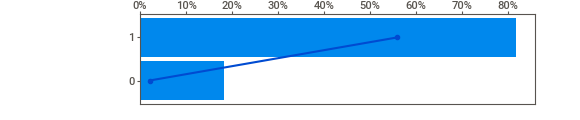
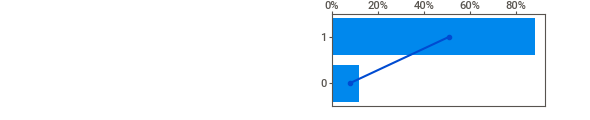
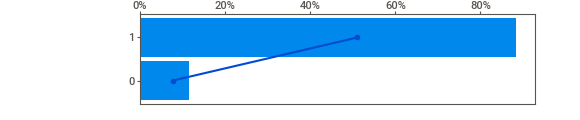
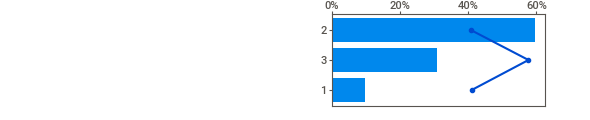
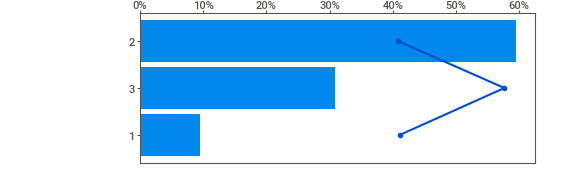
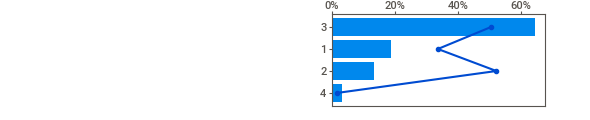
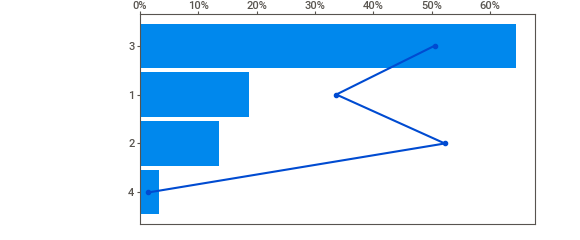
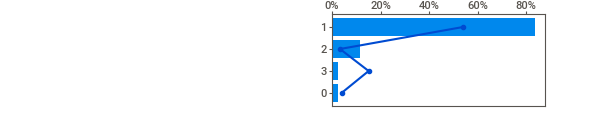
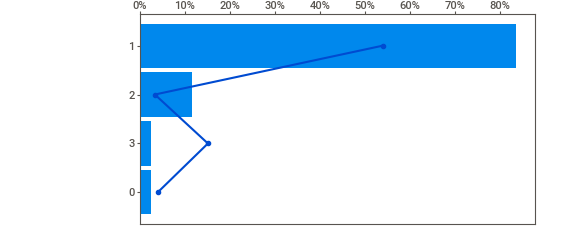
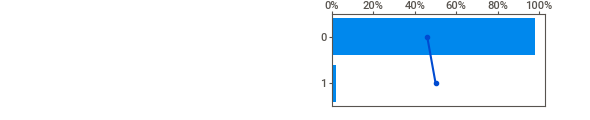
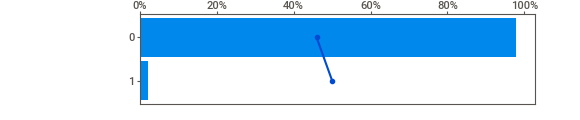
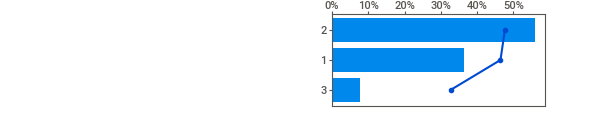
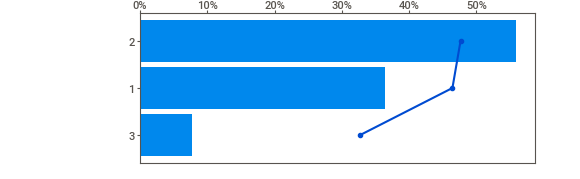
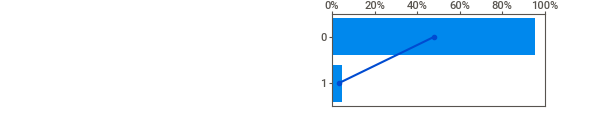
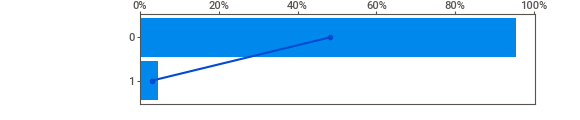
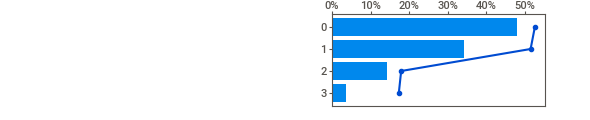
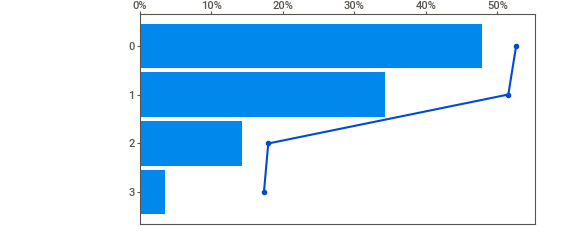
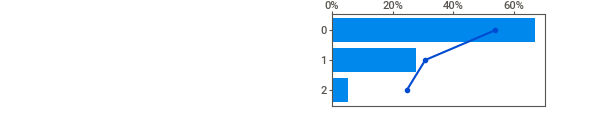
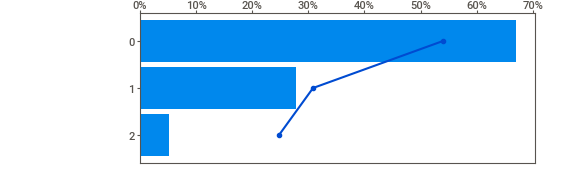
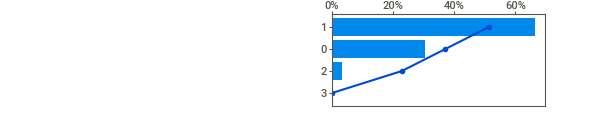
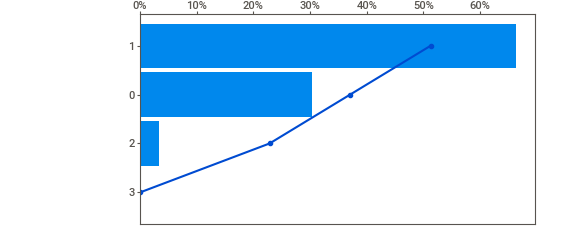
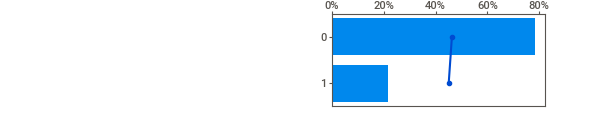
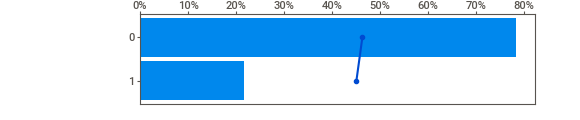
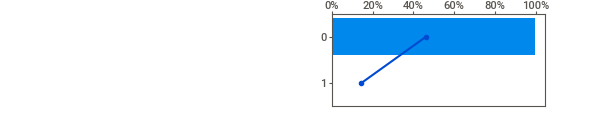
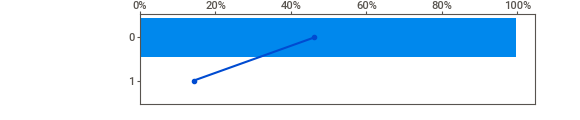
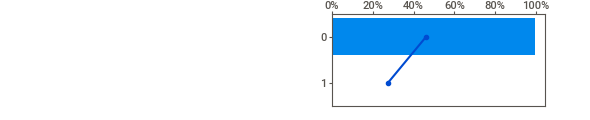
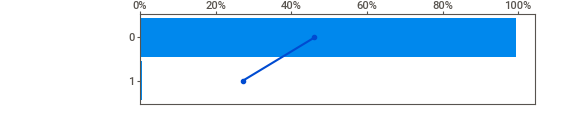
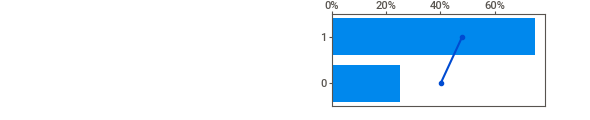
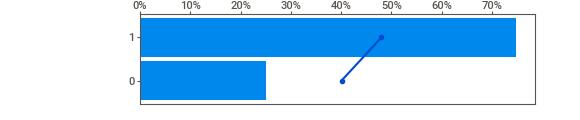
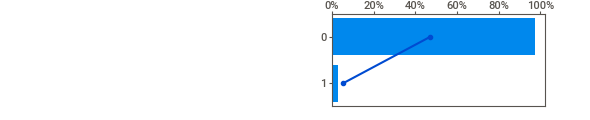
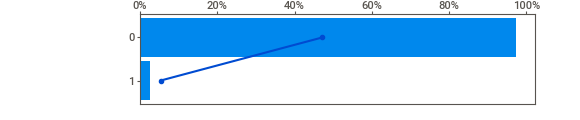
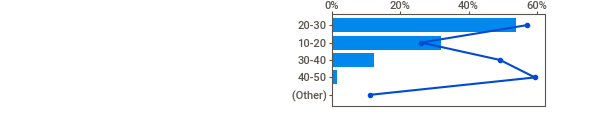
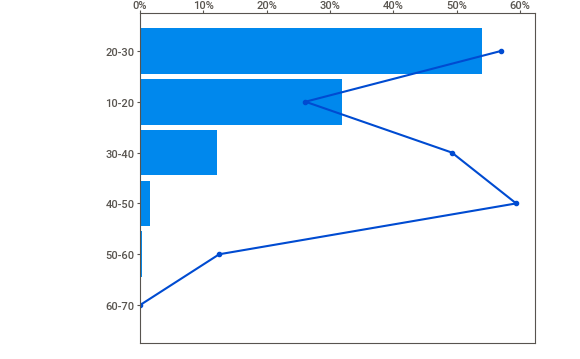
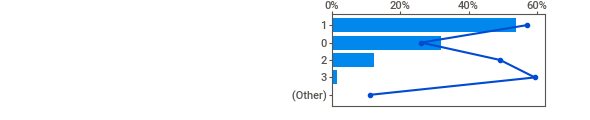
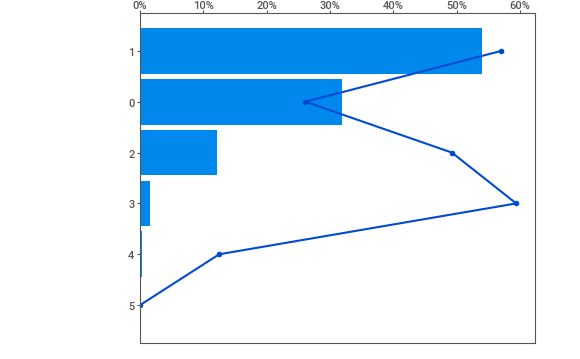
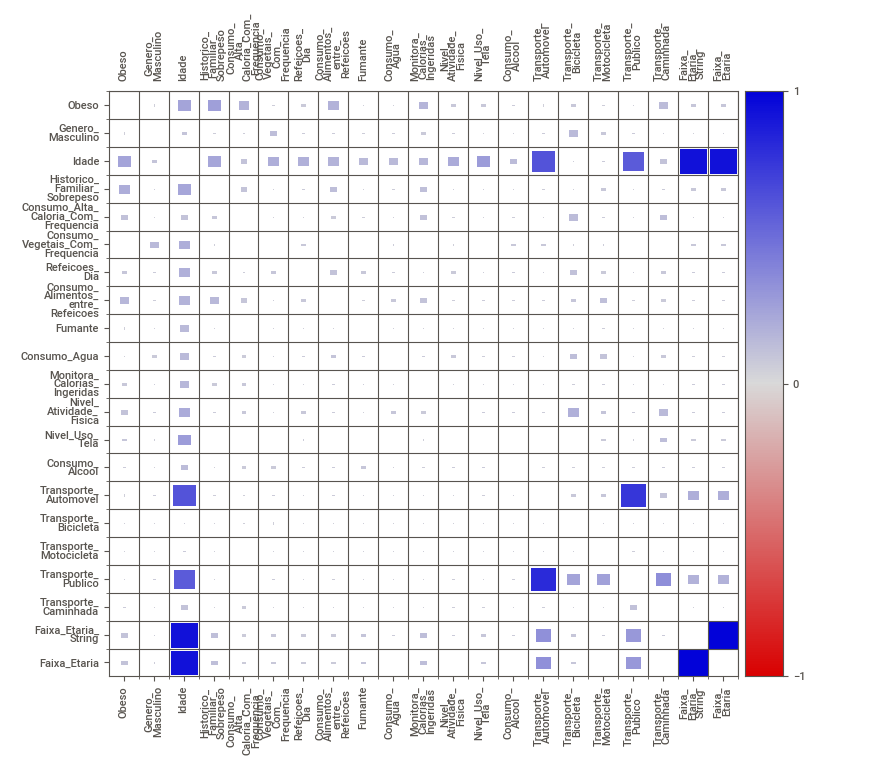
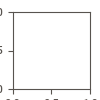

In [27]:
sv_obesidade_report.show_notebook()

## Treinamento do Modelo - Baseline

In [30]:
# Dividir Dados de Treino e Teste
X = df_obesidade.drop(columns=['Obeso', 'Idade', 'Faixa_Etaria_String'], axis=1)
y = df_obesidade['Obeso']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, shuffle=True)

In [31]:
# Treinando Modelo (Gaussian Naive Bayes - é mais utilizado quando se tem uma distribuição normal)
model_baseline = GaussianNB()
model_baseline.fit(X_train, y_train)

GaussianNB()

## Métricas do Modelo Baseline

In [32]:
y_pred = model_baseline.predict(X_test)

In [34]:
classification_report_str = classification_report(y_test, y_pred)
recall_baseline = recall_score(y_test, y_pred, average='macro')
print(f'Relatório de Classificação:\n{classification_report_str}')
print(f'Recall: \n{recall_baseline}')

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      0.60      0.73       339
           1       0.67      0.96      0.79       295

    accuracy                           0.76       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.76      0.76       634

Recall: 
0.775901204939753


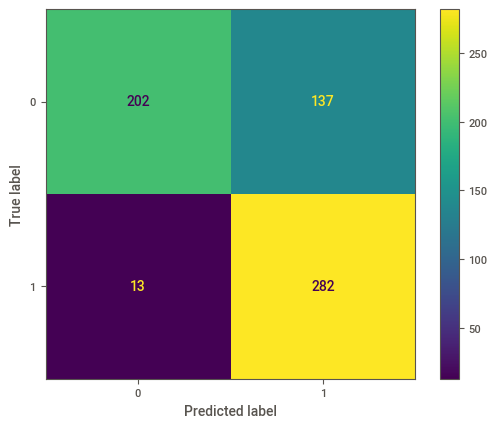

In [36]:
# Matriz de Confusão
confusion_matrix_modelo_baseline = confusion_matrix(y_test, y_pred)
disp_modelo_baseline = ConfusionMatrixDisplay(confusion_matrix_modelo_baseline)
disp_modelo_baseline.plot()

## Treinamento do Modelo - Automated Feature Selection

In [61]:
# Select KBest - Seleção de K Melhores Features baseado em um teste

kbest = SelectKBest(score_func=chi2, k=8)

In [62]:
X_train_kbest = kbest.fit_transform(X_train, y_train)

In [63]:
# Features Selecionadas
kbest_features = kbest.get_support(indices=True)
X_train_best_features = X_train.iloc[:, kbest_features]
X_train_best_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1477 entries, 301 to 2105
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Historico_Familiar_Sobrepeso         1477 non-null   int64   
 1   Consumo_Alta_Caloria_Com_Frequencia  1477 non-null   int64   
 2   Consumo_Alimentos_entre_Refeicoes    1477 non-null   int64   
 3   Monitora_Calorias_Ingeridas          1477 non-null   int64   
 4   Nivel_Atividade_Fisica               1477 non-null   int32   
 5   Nivel_Uso_Tela                       1477 non-null   int32   
 6   Transporte_Caminhada                 1477 non-null   int64   
 7   Faixa_Etaria                         1477 non-null   category
dtypes: category(1), int32(2), int64(5)
memory usage: 82.4 KB


In [64]:
model_kbest = GaussianNB()
model_kbest.fit(X_train_best_features, y_train)

GaussianNB()

## Métricas do Modelo Select Kbest

In [66]:
# Filtrar as features de teste
X_test_kbest = kbest.transform(X_test)
X_test_best_features = X_test.iloc[:, kbest_features]

In [67]:
y_pred_kbest = model_kbest.predict(X_test_best_features)

In [68]:
classification_report_str = classification_report(y_test, y_pred_kbest)
recall_baseline = recall_score(y_test, y_pred_kbest, average='macro')
print(f'Relatório de Classificação (KBest):\n{classification_report_str}')
print(f'Recall (KBest): \n{recall_baseline}')

Relatório de Classificação (KBest):
              precision    recall  f1-score   support

           0       0.94      0.61      0.74       339
           1       0.68      0.95      0.79       295

    accuracy                           0.77       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.77      0.76       634

Recall (KBest): 
0.780105994700265


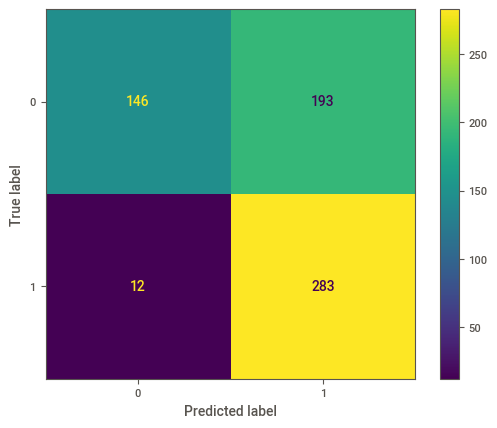

In [44]:
# Matriz de Confusão
confusion_matrix_modelo_kbest = confusion_matrix(y_test, y_pred_kbest)
disp_modelo_kbest = ConfusionMatrixDisplay(confusion_matrix_modelo_kbest)
disp_modelo_kbest.plot()

## Tuning de Hiperparâmetro

In [48]:
# Ajustar Hiperparâmetros do SelectKbest
# k = k melhores features conforme chi2
def naivebayes_optuna(trial):

    k = trial.suggest_int('k', 1, 18)

    kbest = SelectKBest(score_func=chi2, k= k)

    X_train_kbest = kbest.fit_transform(X_train, y_train)
    
    kbest_features = kbest.get_support(indices=True)
    X_train_best_features = X_train.iloc[:, kbest_features]

    # Treinando Modelo com melhores features
    model_kbest_optuna = GaussianNB()
    model_kbest_optuna.fit(X_train_best_features, y_train)

    # Aplicar o seletor de features no conjunto de teste
    X_test_kbest = kbest.transform(X_test)  
    X_test_best_features = X_test.iloc[:, kbest_features]

    # Predição
    y_pred_kbest = model_kbest_optuna.predict(X_test_best_features)

    # Avaliar Recall
    recall_optuna = recall_score(y_test, y_pred_kbest, average='macro') 

    return k, recall_optuna


In [49]:
# Rodar o estudo dos hiperparâmetros
search_space = {'k': range(1, 19)}
estudo_naivebayes = optuna.create_study(sampler=optuna.samplers.GridSampler(search_space=search_space), directions=['minimize', 'maximize'])
estudo_naivebayes.optimize(naivebayes_optuna, n_trials=20)

[I 2024-07-08 11:06:29,163] A new study created in memory with name: no-name-091876a0-4f5d-4d99-a1f5-0e79c2bd5d95
[I 2024-07-08 11:06:29,183] Trial 0 finished with values: [13.0, 0.7742062896855157] and parameters: {'k': 13}. 
[I 2024-07-08 11:06:29,199] Trial 1 finished with values: [7.0, 0.748537573121344] and parameters: {'k': 7}. 
[I 2024-07-08 11:06:29,212] Trial 2 finished with values: [2.0, 0.6659517024148793] and parameters: {'k': 2}. 
[I 2024-07-08 11:06:29,227] Trial 3 finished with values: [10.0, 0.780105994700265] and parameters: {'k': 10}. 
[I 2024-07-08 11:06:29,241] Trial 4 finished with values: [5.0, 0.6950002499875007] and parameters: {'k': 5}. 
[I 2024-07-08 11:06:29,253] Trial 5 finished with values: [12.0, 0.7727313634318285] and parameters: {'k': 12}. 
[I 2024-07-08 11:06:29,272] Trial 6 finished with values: [14.0, 0.7727313634318285] and parameters: {'k': 14}. 
[I 2024-07-08 11:06:29,290] Trial 7 finished with values: [1.0, 0.6140192990350483] and parameters: {'k

In [52]:
# Mostrar o melhor resultado
trial_com_melhor_recall = max(estudo_naivebayes.best_trials, key=lambda x: x.values[1])
print(f'Melhor Recall e menor K: {trial_com_melhor_recall.values[1]}')
print(f'\tTrial number: {trial_com_melhor_recall.number}')
print(f'\tParameters: {trial_com_melhor_recall.params}')
print(f'\tValues (k, recall): {trial_com_melhor_recall.values}')

Melhor Recall e menor K: 0.780105994700265
	Trial number: 11
	Parameters: {'k': 8}
	Values (k, recall): [8.0, 0.780105994700265]


In [54]:
fig = optuna.visualization.plot_pareto_front(estudo_naivebayes)
fig.show()

## Salvar modelo

In [65]:
import joblib

joblib.dump(model_kbest, 'model_kbest.pkl')

['model_kbest.pkl']